In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gdf = gpd.read_file('../data/mesh2011_2016.geojson')
gdf2 = gpd.read_file('../data/mesh2011_2016_diff.geojson')
ku = gpd.read_file('../data/project_area_ku.geojson')

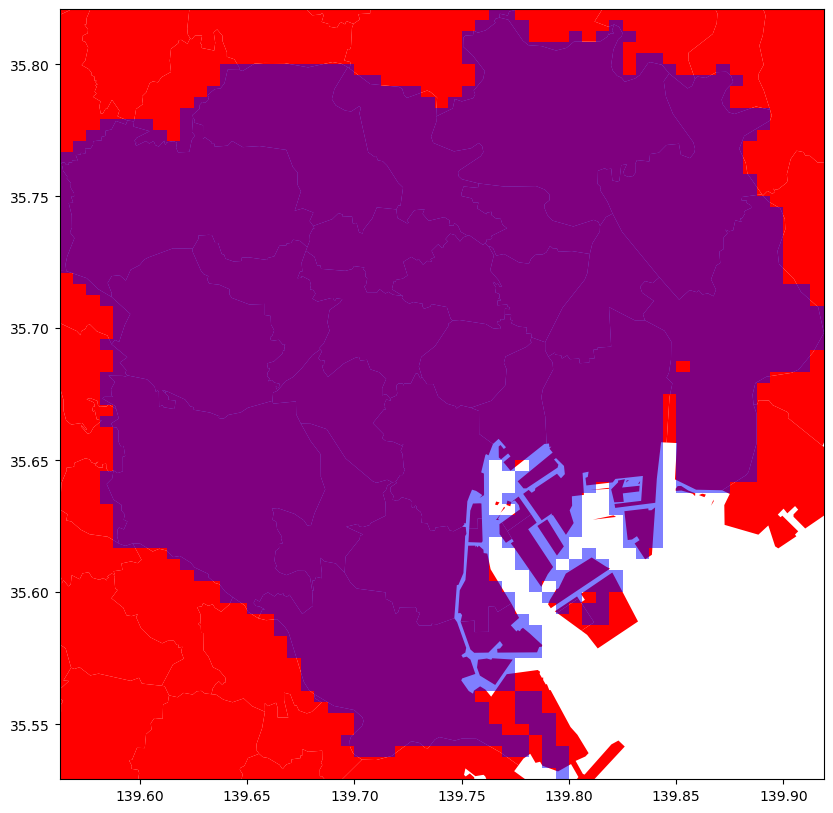

In [7]:
# Create a subplot with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ku
ku.plot(ax=ax, color='red')

# Plot gdf2 with transparent fill
gdf2.plot(ax=ax, color='blue', alpha=0.5)

# Zoom to the extent of gdf2
ax.set_xlim(gdf2.total_bounds[0], gdf2.total_bounds[2])
ax.set_ylim(gdf2.total_bounds[1], gdf2.total_bounds[3])

plt.show()


In [13]:
# convert gdf2 to points
gdf2['geometry2'] = gdf2['geometry'].centroid

/var/folders/09/7rqr2q_j5z180q4m1333f_qm0000gp/T/ipykernel_39303/2016035870.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf2['geometry2'] = gdf2['geometry'].centroid


In [15]:
# assign the geopandas geometry to geometry2
gdf2 = gdf2.set_geometry('geometry2')


<AxesSubplot: >

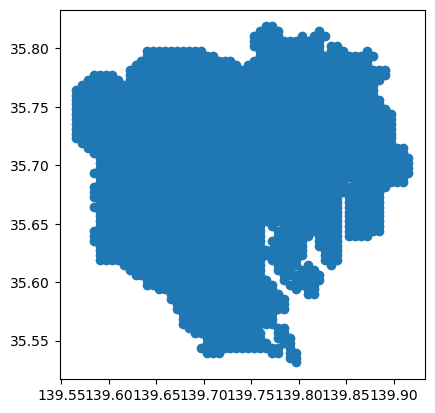

In [16]:
gdf2.plot()

In [18]:
# set gdf2 and ku to the same crs
gdf2 = gdf2.to_crs(ku.crs)

In [20]:
# Conduct spatial join
joined = gpd.sjoin(gdf2, ku, how='inner', op='intersects')


/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [25]:
# show all columns in .info()
# override default to show all columns
pd.set_option('display.max_columns', None)
joined.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2428 entries, 0 to 2496
Columns: 120 entries, KEY_CODE_left to location_class
dtypes: float64(73), geometry(2), int64(19), object(26)
memory usage: 2.2+ MB


<AxesSubplot: >

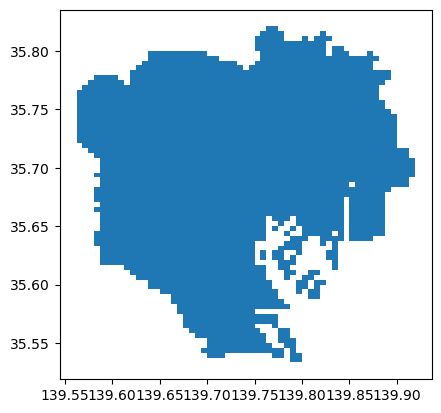

In [28]:
# assign geometry as the geometry column in joined
joined = joined.set_geometry('geometry')
joined.plot()

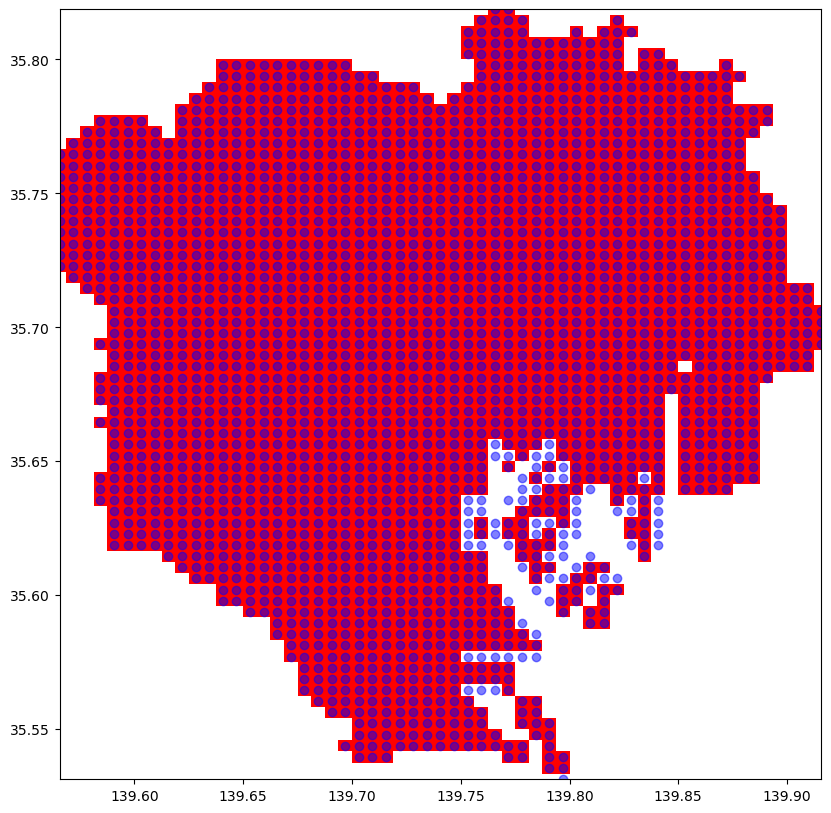

In [29]:
# Create a subplot with two layers
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ku
joined.plot(ax=ax, color='red')

# Plot gdf2 with transparent fill
gdf2.plot(ax=ax, color='blue', alpha=0.5)

# Zoom to the extent of gdf2
ax.set_xlim(gdf2.total_bounds[0], gdf2.total_bounds[2])
ax.set_ylim(gdf2.total_bounds[1], gdf2.total_bounds[3])

plt.show()


In [32]:
# check which geometry column is being used by joined
joined.geometry.name

'geometry'

In [33]:
# get rid of the other geometry column
joined = joined.drop(columns='geometry2')

In [34]:
# export joined as a geojson
joined.to_file('../data/mesh2011_2016_master.geojson', driver='GeoJSON')